In [1]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# A quick preliminary on defining functions in python

An invaluable tool in doing computer programming is to be able to define functions. A function takes inputs and returns a value after combining those inputs in the manner that you prescribe. The syntax for doing this in Python is to use the def command, followed by the name of your function with its arguments in parentheses. After these three ingredients you put a colon, which is followed by the definition of the function. You can have several intermediate calculations on separate lines as always in python, but the last command of a function is usually the return command which returns the final value that you compute on that line. For example, the function below computes factorial in a recursive manner:

In [5]:
def factorial(num):
    prod=1
    for i in range(num):  #In python range(5) gives the array of length 5: [0,1,2,3,4]
        prod=prod *(i+1)  #This line takes the previous value of prod and multiplies it by (i+1) for  
    return prod           #all i in range(num), so we're building the factorial as n!=1*1*2*3*...*n

In [13]:
print(factorial(0))
print(factorial(1))
print(factorial(2))
print(factorial(3))
print(factorial(4))

1
1
2
6
24


You can use already defined functions inside your definitions of new functions. 

Exercise 1: Use the above defined factorial function to write a new function combos(n,r) that computes the combinations $n$ choose $r$. Print a few examples of your combos(n,r) function to demonstrate that it works.

In [14]:
def combos(n,r):
    return factorial(n)/(factorial(r)*factorial(n-r))

In [17]:
print(combos(4,2))
print(combos(5,2))

6.0
10.0


When the definition of a function includes an equal after one of its arguments, that argument will take the value after the equal by default and the value will only change if the user changes it. For example, the code below gives a gaussian function with $a=1$ unless the user inputs a different $a$:

In [18]:
def gauss(x,a=1):
    return np.e**(-a*x**2)

In [20]:
print(gauss(2))
print(np.e**(-2**2))

print(gauss(2,3))
print(np.e**(-3*2**2))

0.018315638888734186
0.018315638888734186
6.144212353328214e-06
6.144212353328214e-06


# Bayesian Inference

It is very convenient to give the different parts of Bayes' formula names that relate to how we think about them in the scientific context. Again Bayes' formula is
$$
P(\text{hypothesis}\ |\ \text{data}) = \frac{P(\text{data}\ | \ \text{hypothesis}) P(\text{hypothesis})}{P(\text{data}) }.
$$
The left hand side is what we would like to know: the probability of our hypothesis given some data that we have recently collected. We call it the 'posterior', and it is posterior in the sense that it is what we have learned *after* we have taken the data into account. The term $P(\text{data}\ | \ \text{hypothesis})$ is called the 'likelihood' as it is determined by how likely the collected data are given the truth of our hypothesis. 

The probability $P(\text{hypothesis})$ is a bit subtle. We have been writing it as unconditioned, but in practice probabilities are always conditioned by what we know about the background circumstances. For example, if we know that a coin is loaded, then we would not take the hypothesis that it is fair seriously. We can summarize all of this background information by the symbol $I$ and it should technically condition all the probabilities in the above formula. In this specific instance, we would write $P(\text{hypothesis}) = P(\text{hypothesis}|I)$. We call $P(\text{hypothesis}|I)$ the 'prior'. It is the probability of the hypothesis given what we already know before the new data come in, and, in this sense, is our understanding prior to these data. 

Thinking about Bayes' theorem in this way is very practical for doing data analysis. We can think of Bayes' formula as a way to 'update' our understanding of $P(\text{hypothesis}\ |\ \text{data})$ as new data come in.  

Finally the denominatore $P(\text{data})$ is called the 'evidence'. As suggested in the homework assignment, we will drop this term for the remainder of this notebook and instead normalize the simpler Bayes' formula
$$
P(\text{hypothesis}\ |\ \text{data}) = N\cdot P(\text{data}\ | \ \text{hypothesis}) P(\text{hypothesis}).
$$

# Using Data to Update the Posterior

Let us return to the example of a coin that is flipped $n$ times. Suppose that you are given this coin by someone that you don't know well and are unsure of whether it is fair or not. Recall that we have named the probability that this coin comes up heads in a single flip $p$ and the probability of tails $q=1-p$. 

Now, suppose you flip the coin 5 times and you get the resulting data $\{H,H,T,H,T\}$. What can you say about the weighting $p$ of the coin from these data alone? Of course, it won't be too much as this is a small data set, but still what can you say? Let's answer these questions by taking the data one at a time. 

Below I've written a python function that gives you the posterior probability for the weight $p$ after you input an arbitrary data set. The data are specified as the number of times that you got heads, which is called heads, and the number of times that you got tails, which is called tails. This posterior is computed using the binomial distribution that you have been studying and with the assumption that you don't know anything about the coin when you receive it. Since you don't know anything about the coin, your prior on the hypothesis that it has weighting $p$ is completely uniform. But, recall that a uniform prior has a constant probability density, so under this assumption we can also absorb the prior into the normalization constant $N$. Thus the posterior is just given by
$$
P(\text{hypothesis: coin has weight $p$}\ |\ \text{data}) = N\cdot P(\text{data}\ | \ \text{hypothesis: coin has weight $p$}).
$$
We know $ P(\text{data}\ | \ \text{hypothesis: coin has weight $p$})$ because this is just the binomial distribution with $p$, $q=1-p$, and $x=$heads. This explains how I came up with the code below:

In [26]:
def plot_posterior(heads, tails, makeplot=True):

    norm = integrate.quad(lambda p: p**(heads)*(1-p)**(tails), 0, 1)

    xvals=np.linspace(0.0, 1.0, 1000)
    prob_density = [p**heads*(1-p)**tails/norm[0] for p in xvals]

    if makeplot:
        plt.figure(figsize=(14,7))
        plt.plot(xvals, prob_density, '-k')
        plt.ylabel('P(p|{data})',fontsize=20)
        plt.xlabel('p',fontsize=20)
        #plt.title('Fit to Measured Values')
        plt.xlim(-0.01, 1.01)
        #plt.ylim(0, 1)
        plt.show();

For the first coin flip you got H, so heads=1 and tails=0. Putting these values into the code gives the following plot:

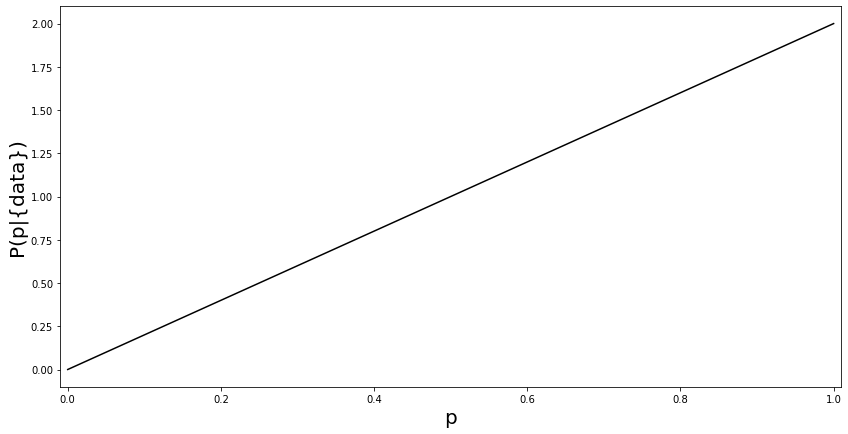

In [28]:
plot_posterior(1,0,True)

This plot makes perfect sense. After the first flip of the coin, from which we got heads, it is no longer possible that $p=0$, since $p=0$ would represent a coin that always gave tails. The second coin flip gave another heads, so heads=2 and tails=0, and we get the posterior:

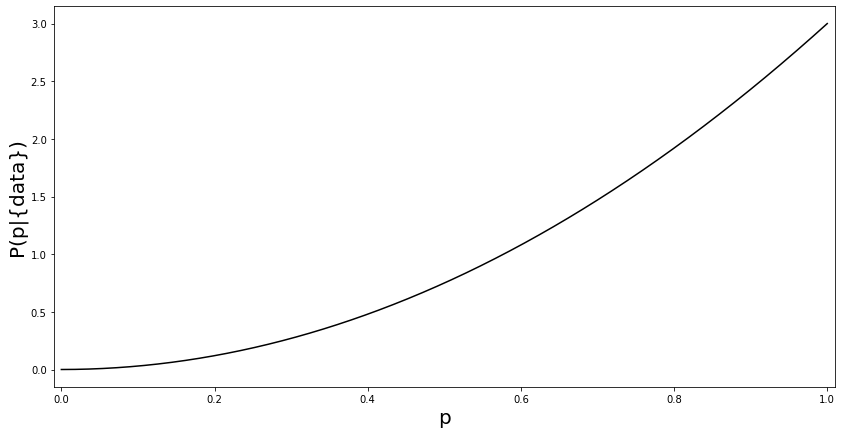

In [29]:
plot_posterior(2,0,True)

The second heads result makes $p=1$ more probable.

On the third flip you finally get a tails and so heads=2 and tails=1. This gives the posterior:

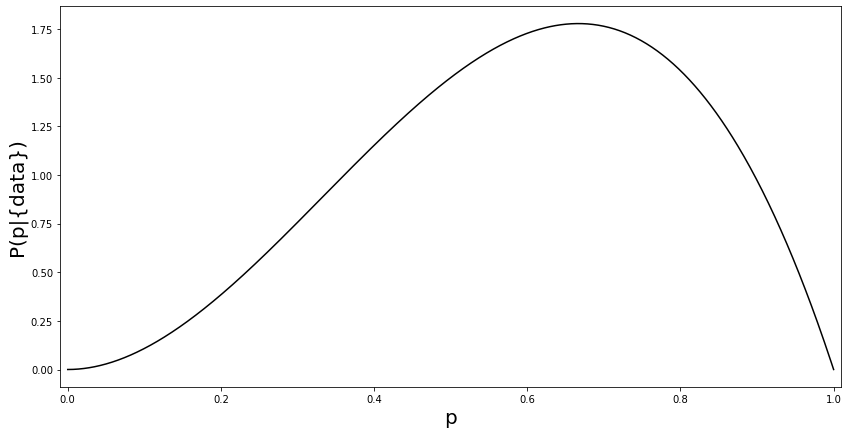

In [30]:
plot_posterior(2,1,True)

Now we see that the probability of $p=1$ has dropped to zero. Again this makes sense as one of our coin flips has come up tails. 

Next we get another heads and the posterior:

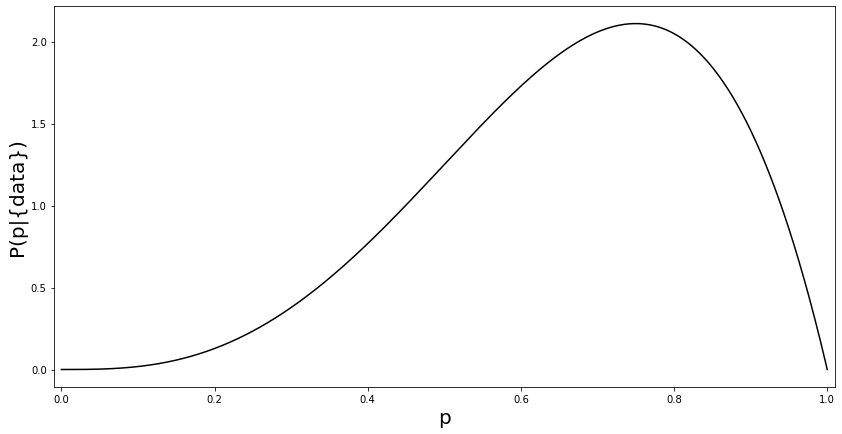

In [31]:
plot_posterior(3,1,True)

This posterior is biased towards larger $p$ since we have gotten 3 heads and only 1 tails. 

Finally, at the end of all 5 coin tosses the posterior is:

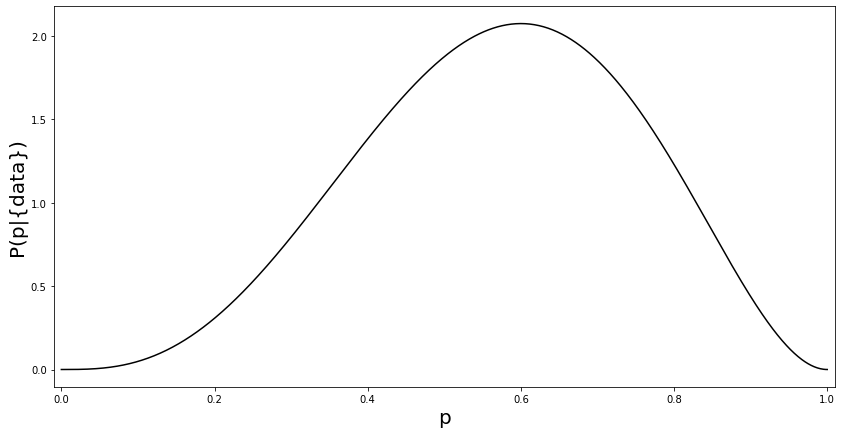

In [32]:
plot_posterior(3,2,True)

What can we say about $p$ after these five tosses given our assumption of a uniform prior? The above plot nicely summarizes the answer. The peak probability is somewhere near $p=0.6$, so a pretty fair coin, but we have a large uncertainty in this value because the distribution is fairly wide. 

We can make these two statements precise by computing the expectation value and the standard deviation of the posterior. 

Exercise 2: Copy the code for the posterior I wrote above and write a new function adding two more return values exp and sig, the expectation value of $p$ and the standard deviation in $p$. *Hint: you can compute each of these things separately and then return them in a list, like*

*return [exp, sig].*

In [47]:
def plot_posterior2(heads, tails, makeplot=True):

    norm = integrate.quad(lambda p: p**(heads)*(1-p)**(tails), 0, 1)

    xvals=np.linspace(0.0, 1.0, 1000)
    prob_density = [p**heads*(1-p)**tails/norm[0] for p in xvals]
    exp =  integrate.quad(lambda p: p*p**(heads)*(1-p)**(tails)/norm[0], 0, 1)
    expOfpSq = integrate.quad(lambda p: p**2*p**(heads)*(1-p)**(tails)/norm[0], 0, 1)
    sig = np.sqrt(expOfpSq[0]-exp[0]**2)

    if makeplot:
        plt.figure(figsize=(14,7))
        plt.plot(xvals, prob_density, '-k')
        plt.ylabel('P(p|{data})',fontsize=20)
        plt.xlabel('p',fontsize=20)
        #plt.title('Fit to Measured Values')
        plt.xlim(-0.01, 1.01)
        #plt.ylim(0, 1)
        plt.show();
    return [exp[0],sig]

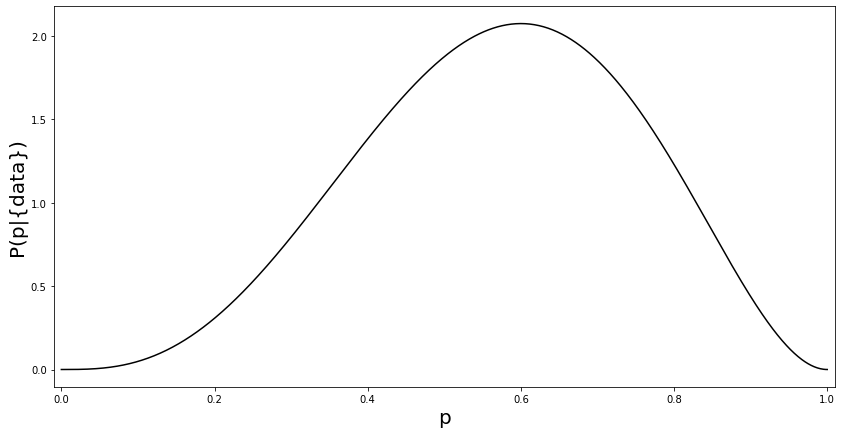

In [49]:
res1=plot_posterior2(3,2,True)

Exercise 3: Use your new function to compute the most probable value of $p$ and your uncertainty in that value for the 5 coin tosses given above. Report these as $E(p) \pm \sigma$.

My answer is: 

In [51]:
res1[0],res1[1]

(0.5714285714285714, 0.17496355305594155)

One of you correctly pointed out that I used sloppy language here. Sorry about that! I asked for the most probable value of $p$, but then I told you to report the expectation value $E(p)$. In general these are not the same, which is important. In many Physics applications they are very close to one another. I will happily accept either answer. If you want to compute the most probable value, you can do it by differentiation:

$h\cdot p^{h-1} \cdot (1-p)^{t}-p^h \cdot t(1-p)^{t-1} = 0 \implies h(1-p)-p t=0$ or $p_{\text{most probable}} = h/(h+t)$

Below I will only report the expectation values, but you should consider an answer that you give with the most probably value as fully correct. 

Exercise 4: Suppose you now flip the coin 95 more times. Your total data set of 100 flips has 78 heads and 22 tails. Given this data set what what is your new $E(p) \pm \sigma$?

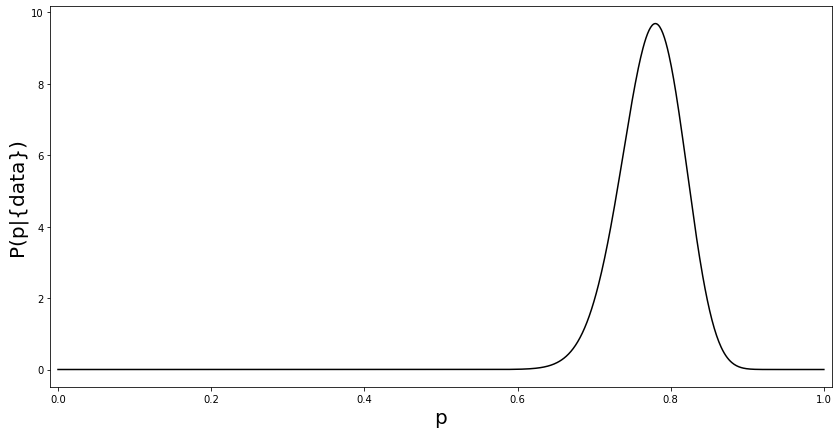

In [52]:
res2=plot_posterior2(78,22,True)

In [53]:
res2

[0.7745097934314653, 0.04117747546550512]

Exercise 5: Either returning once more to your code above or writing a new function from scratch, take this posterior as given, and compute the probability that $p$ is between $[0.6,0.7]$. What about between $[0.7,0.8]$?

In [61]:
def plot_posterior3(heads, tails, makeplot=True):

    norm = integrate.quad(lambda p: p**(heads)*(1-p)**(tails), 0, 1)

    xvals=np.linspace(0.0, 1.0, 1000)
    prob_density = [p**heads*(1-p)**tails/norm[0] for p in xvals]
    exp =  integrate.quad(lambda p: p*p**(heads)*(1-p)**(tails)/norm[0], 0, 1)
    expOfpSq = integrate.quad(lambda p: p**2*p**(heads)*(1-p)**(tails)/norm[0], 0, 1)
    sig = np.sqrt(expOfpSq[0]-exp[0]**2)
    prob1 = integrate.quad(lambda p: p**(heads)*(1-p)**(tails)/norm[0], 0.6, 0.7)
    prob2 = integrate.quad(lambda p: p**(heads)*(1-p)**(tails)/norm[0], 0.7, 0.8)

    if makeplot:
        plt.figure(figsize=(14,7))
        plt.plot(xvals, prob_density, '-k')
        plt.ylabel('P(p|{data})',fontsize=20)
        plt.xlabel('p',fontsize=20)
        #plt.title('Fit to Measured Values')
        plt.xlim(-0.01, 1.01)
        #plt.ylim(0, 1)
        plt.show();
    return [exp[0],sig, prob1[0],prob2[0]]

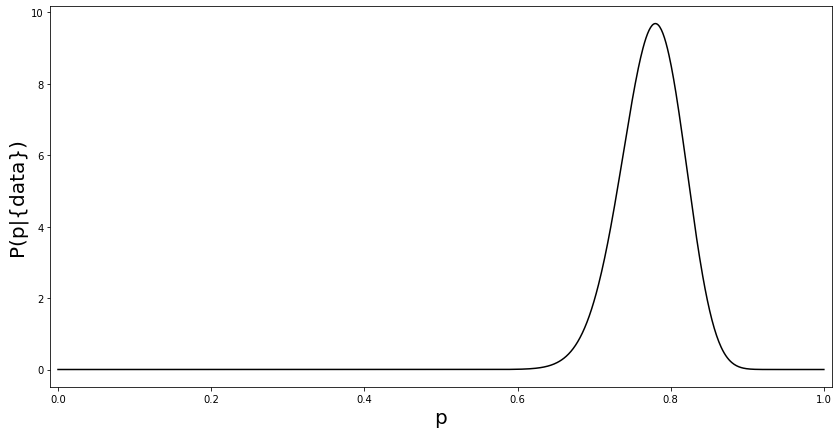

[0.7745097934314653,
 0.04117747546550512,
 0.04207382179665489,
 0.6797974432723811]

In [62]:
plot_posterior3(78,22,True)